the plot of the network will be presented as a JPEG file (made in PPT)

the mathematical equation for this network
$$y = softmax(v\odot relu(wh\odot relu(w\odot x+b_1)+b_2)+b_3)$$

In [1]:
### Feedforward ###

#the mathematical equation for this network
#y = softmax(v*relu(wh*relu(w*x + b_1)+b_2)+b3) note: * means dot product

#import libraries
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#set random seed for regenerating outputs
np.random.seed(1234)

#ReLu activation and Softmax function
relu = np.vectorize(lambda z: np.fmax(0, z))
def softmax(x): 
    return np.exp(x) / np.sum(np.exp(x), axis=0)

## build a 2-layer network ##
n_dims = 2
n_hidden_units_1 = 3
n_hidden_units_2 = 2
n_outputs = 3

#weight parameters for Layer 1
w_11, w_12, w_13, w_21, w_22, w_23 = np.random.random(n_dims * n_hidden_units_1)
#weight parameters for Layer 2
wh_11, wh_12, wh_21, wh_22, wh_31, wh_32 = np.random.random(n_hidden_units_1 * n_hidden_units_2)
#weight parameters for Layer 3
v_11, v_12, v_13, v_21, v_22, v_23 = np.random.random(n_hidden_units_2 * n_outputs)
#biases Layer 1
b_11, b_12, b_13 = np.random.random(n_hidden_units_1)
b_1 = np.array([b_11, b_12, b_13])
#biases Layer 2
b_21, b_22 = np.random.random(n_hidden_units_2)
b_2 = np.array([b_21, b_22])
#biases Layer 3
b_3 = np.random.random(n_outputs)

#restructing for ease of implementation
w_1 = np.array([w_11, w_12, w_13])
w_2 = np.array([w_21, w_22, w_23])
wh_1 = np.array([wh_11, wh_12])
wh_2 = np.array([wh_21, wh_22])
wh_3 = np.array([wh_31, wh_32])
v_1 = np.array([v_11, v_12, v_13])
v_2 = np.array([v_21, v_22, v_23])
w = np.array([w_1, w_2])
wh = np.array([wh_1, wh_2, wh_3])
v = np.array([v_1, v_2])

#define the network
def ff_nn_2_ReLu(x, w, wh, v, b_1, b_2, b_3):
    a_1 = x.dot(w) + b_1
    h_1 = relu(a_1)
    a_2 = h_1.dot(wh) + b_2
    h_2 = relu(a_2)
    a_3 = h_2.dot(v) + b_3
    y = softmax(a_3)
    return y

In [2]:
#test by using the example provided in the assignment
x = np.array([[1, 0, 0], [-1, -1, 1]])
x = x.transpose()
w1 = np.array([[1, 0], [-1, 0], [0, 0.5]])
w1 = w1.transpose()
w2 = np.array([[1, 0, 0], [-1, -1, 0]])
w2 = w2.transpose()
v = np.array([[1, 1], [0, 0], [-1, -1]])
v = v.transpose()
b1 = np.array([[0], [0], [1]])
b1 = b1.transpose()
b2 = np.array([[1], [-1]])
b2 = b2.transpose()
b3 = np.array([[1], [0], [0]])
b3 = b3.transpose()

ff_nn_2_ReLu(x, w1, w2, v, b1, b2, b3)

array([[ 0.57611688,  0.33333333,  0.1553624 ],
       [ 0.21194156,  0.33333333,  0.4223188 ],
       [ 0.21194156,  0.33333333,  0.4223188 ]])

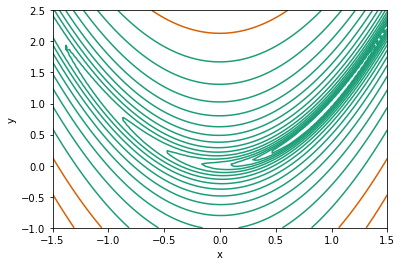

In [3]:
### Gradient Descent ###

#load libraries
%matplotlib inline
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import random
from __future__ import division

#plot the function in 2-D
rosenbrock = lambda x,y: (1 - x)**2 + 100*(y - x**2)**2
n = 100
m = 100
a = -1.5 
b = 1.5 
c = -1 
d = 2.5 
X,Y = np.meshgrid(np.linspace(a, b, n), np.linspace(c, d, m))
Z = rosenbrock(X, Y)
plt.contour(X, Y, Z, np.logspace(-0.5, 3.5, 20, base=10), cmap='Dark2')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

the partial derivatives of f with respect to x and to y
$$\frac{\partial f}{\partial x} = (-400)*x*y + 400*(x^3) + 2*x - 2$$ 
$$\frac{\partial f}{\partial y} = 200*y - 200*(x^2)$$

In [4]:
##Gradient Descent algorithm

#the partial derivatives of f with respect to x and to y
#df/dx = (-400)*x*y + 400*(x^3) + 2*x - 2 
#df/dy = 200*y - 200*(x^2)

#define gradient
def grad_f(vector):
    x, y = vector
    df_dx = (-400) * x * y + 400 * (x**3) + 2 * x - 2 
    df_dy = 200 * y - 200 * (x**2)
    return np.array([df_dx, df_dy])

#gradient descent
def grad_descent(starting_point = None, iterations = 10, learning_rate = 0.01):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1, 1, size = 2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

#visualize trajectory
def grad_contours(iterations, learning_rate):
    np.random.seed(1234) #fix the trajectory
    trajectory = grad_descent(iterations = iterations, learning_rate = learning_rate)
    fig, ax = plt.subplots()
    ax.contour(X, Y, Z, np.logspace(-0.5, 3.5, 20, base=10), cmap='Dark2')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1, 2.5)
    x = trajectory[:,0]
    y = trajectory[:,1]
    plt.title("learning rate: " + str(learning_rate))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x,y,'-o')
    plt.show()

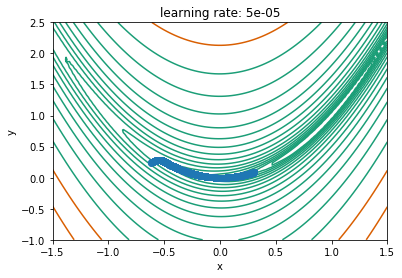

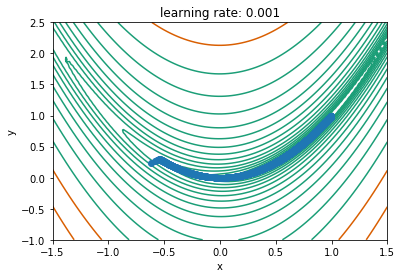

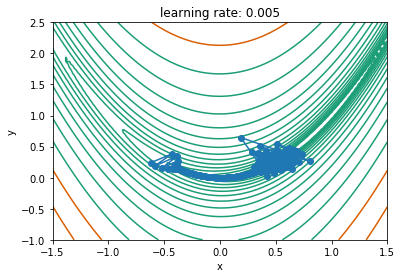

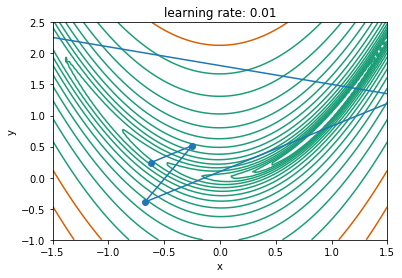

In [5]:
#test on different learning rates below
grad_contours(10000, 0.00005)
grad_contours(10000, 0.001)
grad_contours(10000, 0.005)
grad_contours(10000, 0.01)

In [6]:
##Gradient Descent With Momentum algorithm

#gradient descent momentum
def gradient_descent_momentum(starting_point = None, iterations = 10, alpha = 0.9, epsilon = 10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1, 1, size = 2)
    trajectory = [point]
    v = np.zeros(point.size)

    for i in range(iterations):
        grad = grad_f(point)
        v = alpha * v + epsilon * grad
        point = point - v
        trajectory.append(point)            
    return np.array(trajectory)

#visualize trajectory
def gdm_contours(iterations, alpha, epsilon):
    np.random.seed(1234) #fix the trajectory
    trajectory = gradient_descent_momentum(iterations = iterations, alpha = alpha, epsilon = epsilon)    
    fig, ax = plt.subplots()
    ax.contour(X, Y, Z, np.logspace(-0.5, 3.5, 20, base=10), cmap='Dark2')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1, 2.5)
    x = trajectory[:,0]
    y = trajectory[:,1]    
    plt.title("alpha: " + str(alpha) + " " + "epsilon: " + str(epsilon) + " " + "iterations: " + str(iterations))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x,y,'-o')
    plt.show()

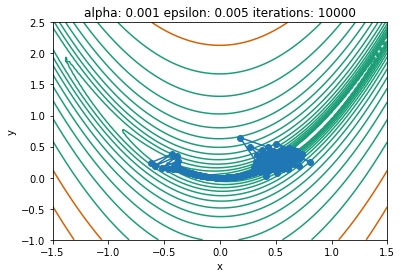

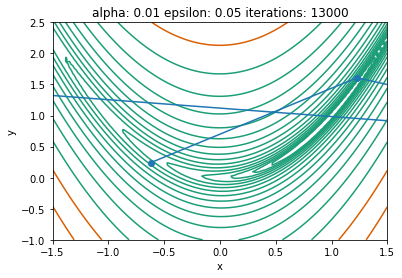

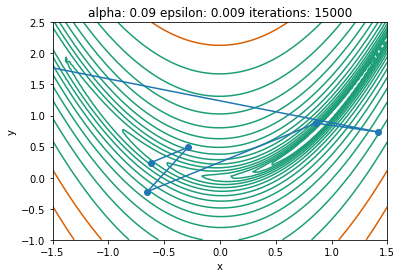

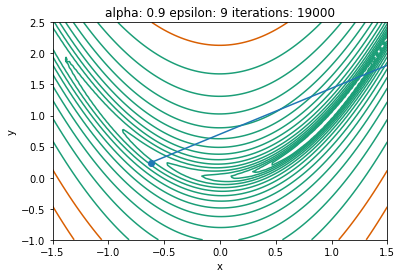

In [7]:
#test on different settings of the algorithm's hyperparameters below
gdm_contours(10000, 0.001, 0.005)
gdm_contours(13000, 0.01, 0.05)
gdm_contours(15000, 0.09, 0.009)
gdm_contours(19000, 0.9, 9)

derive expressions of the gradient of the Loss function with respect to each of the model parameters
$$y_{hat} = softmax(V\odot relu(W_2\odot relu(W_1\odot x+b_1)+b_2)+b_3)$$
$$\frac{\partial L}{\partial y_{hat}} = y_{hat}-y$$
$$\frac{\partial L}{\partial W1} = \big[W2^T\big[V^T\big[(y_{hat}-y)\odot softmax'(a3)\big]\big]\odot relu'(a2)\big]\odot relu'(a1)\cdot x^T$$
$$\frac{\partial L}{\partial W2} = \big[V^T\big[(y_{hat}-y)\odot softmax'(a3)\big]\big]\odot relu'(a2)\cdot h1^T$$
$$\frac{\partial L}{\partial V} = (y_{hat}-y)\odot softmax'(a3)\cdot h2^T$$
$$\frac{\partial L}{\partial b1} = \big[W2^T\big[V^T\big[(y_{hat}-y)\odot softmax'(a3)\big]\big]\odot relu'(a2)\big]\odot relu'(a1)\cdot 1$$ 
$$\frac{\partial L}{\partial b2} = \big[V^T\big[(y_{hat}-y)\odot softmax'(a3)\big]\big]\odot relu'(a2)\cdot 1$$ 
$$\frac{\partial L}{\partial b3} = (y_{hat}-y)\odot softmax'(a3)\cdot 1$$ 

In [8]:
### Backprop ###

#helper function
def relu(x):
    return np.maximum(x, 0)
def softmax(q):
    return np.exp(q)/(np.sum(np.exp(q), axis=1))[:, np.newaxis]
def cross_entropy_loss(y, y_hat):
    tot = y * np.log(y_hat)
    return -tot.sum()
def yhat(x, y, param):
    #get parameters
    W1 = param[0:6].reshape(2,3)
    W2 = param[6:12].reshape(3,2)
    V = param[12:18].reshape(2,3)
    b1 = param[18:21].reshape(1,3)
    b2 = param[21:23].reshape(1,2)
    b3 = param[23:26].reshape(1,3)
    #feedforward as defined in P1
    a1 = x.dot(W1) + b1
    h1 = relu(a1)
    a2 = h1.dot(W2) + b2
    h2 = relu(a2)
    a3 = h2.dot(V) + b3
    y = softmax(a3)
    return y
#define a function which returns the gradient of the Loss
def grad_f(x, y, param):
    #get parameters based on shape of matrix
    W1 = param[:6].reshape(2,3)
    W2 = param[6:12].reshape(3,2)
    V = param[12:18].reshape(2,3)
    b1 = param[18:21].reshape(1,3)
    b2 = param[21:23].reshape(1,2)
    b3 = param[23:26].reshape(1,3)
    #feedforward as defined in P1
    a1 = x.dot(W1) + b1
    h1 = relu(a1)
    a2 = h1.dot(W2) + b2
    h2 = relu(a2)
    a3 = h2.dot(V) + b3
    y_hat = softmax(a3)
    #backprop starting from the loss fuction
    layer_3 = (y_hat - y).sum(axis=0)
    layer_2 = (y_hat - y).dot(V.T) * (h2>0)
    layer_1 = layer_2.dot(W2.T) * (h1>0)
    #calculate derivatives for parameters
    d_V = (h2.T).dot(y_hat - y)
    d_W2 = (h1.T).dot(layer_2)
    d_W1 = x.T.dot(layer_1)
    d_b3 = layer_3
    d_b2 = (layer_2).sum(axis=0)
    d_b1 = (layer_1).sum(axis=0)
    #generate the gradient
    gradient = np.array(list(d_W1.reshape(6,)) + list(d_W2.reshape(6,)) + list(d_V.reshape(6,)) 
                        + list(d_b1.reshape(3,)) + list(d_b2.reshape(2,)) + list(d_b3.reshape(3,)))
    return gradient

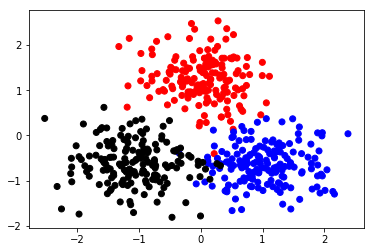

In [9]:
#reference: multiclass-classification.ipynb from Dr. Hines' section#
#data generator
def gmms(n = 10000, plot=False):
    np.random.seed(1234)
    mean_1 = [0, 2] ; mean_2 = [2, -2] ; mean_3 = [-2, -2]
    mean = [mean_1, mean_2, mean_3] ; cov = [[1, 0], [0, 1]]  
    n_samples = n
    pr_class_1 = pr_class_2 = pr_class_3 = 1/3.0
    n_class = (n_samples * np.array([pr_class_1, pr_class_2, pr_class_3])).astype(int)
    for i in range(3):
        x1,x2 = np.random.multivariate_normal(mean[i], cov, n_class[i]).T
        if (i==0):
            xs = np.array([x1,x2])
            cl = np.array([n_class[i]*[i]])
        else: 
            xs_new = np.array([x1,x2])
            cl_new = np.array([n_class[i]*[i]])
            xs = np.concatenate((xs, xs_new), axis = 1)
            cl = np.concatenate((cl, cl_new), axis = 1)            
    y = pd.Series(cl[0].tolist())
    y = pd.get_dummies(y).as_matrix()      
    mu = xs.mean(axis = 1)
    std = xs.std(axis = 1)
    xs = (xs.T - mu) / std
    return xs, y, cl

x, y, cl = gmms(n = 500, plot=False)
new_c = cl[0]
colors = ["red", "blue", "black"]
plt.scatter(x[:,0], x[:,1], c=new_c, cmap=matplotlib.colors.ListedColormap(colors))

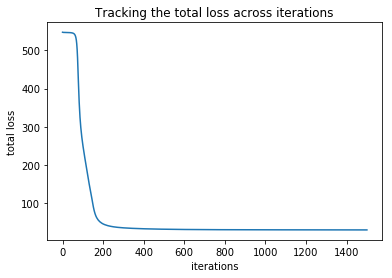

In [10]:
#fit the network using Gradient Descent
def grad_descent(x, y, iterations = 10, learning_rate = 0.01):
    #get parameters
    np.random.seed(1234)
    params = np.random.uniform(-0.1, 0.1, size=26)
    trajectory = [params]
    losses = [cross_entropy_loss(y, yhat(x, y, params))]    
    for i in range(iterations):
        grad = grad_f(x, y, params)
        params = params - learning_rate * grad
        trajectory.append(params)
        losses.append(cross_entropy_loss(y, yhat(x, y, params)))
    return (np.array(trajectory), losses)

#plot the total loss
trajectory, losses = grad_descent(x, y, iterations = 1500, learning_rate = 0.001)
plt.plot(losses)
plt.title("Tracking the total loss across iterations")
plt.xlabel("iterations")
plt.ylabel("total loss")
plt.show()

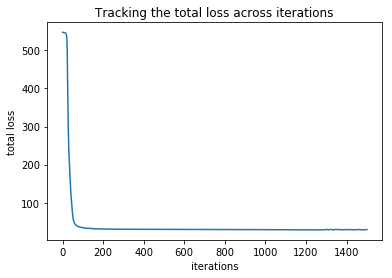

In [11]:
#fit the network using Gradient Descent with Momentum
def grad_descent_with_momentum(x, y, iterations = 10, alpha = 0.8, epsilon = 0.001):
    #get parameters
    np.random.seed(1234)
    params = np.random.uniform(-0.1, 0.1, size=26)
    #initialize variables
    trajectory = [params]
    losses = [cross_entropy_loss(y, yhat(x, y, params))]
    vec = np.zeros(params.size)    
    for i in range(iterations):
        grad = grad_f(x, y, params)
        vec = alpha * vec + epsilon * grad
        params = params - vec
        trajectory.append(params)
        losses.append(cross_entropy_loss(y, yhat(x, y, params)))        
    return (np.array(trajectory), losses)

#plot the total loss
trajectory, losses = grad_descent_with_momentum(x, y, iterations = 1500, alpha = 0.5, epsilon = 0.002)
plt.plot(losses)
plt.title("Tracking the total loss across iterations")
plt.xlabel("iterations")
plt.ylabel("total loss")
plt.show()

From the graphs above, we can see that Gradient Descent with Momentum seems to converge more efficiently. The total loss 
decreases faster for GD with Momentum than GD in the region (0, 200). They are almost the same after 200 iterations.